In [ ]:
!pip install yfinance
!pip install pandas_market_calendars
!pip install statsmodels
!pip install xgboost
!pip install matplotlib-venn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.9/208.9 kB 12.3 MB/s eta 0:00:00


In [ ]:
!pip install pandas_market_calendars
!pip install yfinance scikit-learn xgboost matplotlib
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import pandas_market_calendars as mcal
import matplotlib.pyplot as plt

# ไลบรารีสำหรับ Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# ------------------------------
# 0. กำหนด list หุ้นทั้งหมด
# ------------------------------
tickers = ["AAPL", "AMD", "APP", "AVGO", "GOOG", "GOOGL", "META", "MSFT", "NVDA", "PLTR"]

# กำหนดช่วงวันที่
start_date = datetime(2022, 1, 1)
end_date   = datetime(2024, 12, 31)

all_data_list = []

# ------------------------------
# 1. ดาวน์โหลดข้อมูลหุ้นทั้งหมด
# ------------------------------
for ticker in tickers:
    print(f"📥 Downloading {ticker} ...")
    data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

    if data.empty:
        print(f"❌ No data for {ticker}")
        continue

    data.reset_index(inplace=True)

    if isinstance(data.columns, pd.MultiIndex):
        data.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in data.columns.values]

    def clean_columns(cols):
        cleaned = []
        for col in cols:
            if 'Date' in col:
                cleaned.append('Date')
            else:
                cleaned.append(col.split()[0])
        return cleaned

    data.columns = clean_columns(data.columns)
    data['Symbol'] = ticker.upper()

    wanted_cols = ['Date', 'Close', 'High', 'Low', 'Open', 'Symbol']
    data = data[[col for col in wanted_cols if col in data.columns]]

    all_data_list.append(data)

# Concatenate all dataframes in the list into a single dataframe
flat_df = pd.concat(all_data_list, ignore_index=True)




📥 Downloading AAPL ...


/tmp/ipython-input-3812362797.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3812362797.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed

📥 Downloading AMD ...
📥 Downloading APP ...



/tmp/ipython-input-3812362797.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3812362797.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))


📥 Downloading AVGO ...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3812362797.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3812362797.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))


📥 Downloading GOOG ...
📥 Downloading GOOGL ...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3812362797.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3812362797.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))


📥 Downloading META ...
📥 Downloading MSFT ...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3812362797.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))


📥 Downloading NVDA ...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3812362797.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed

📥 Downloading PLTR ...


In [ ]:
full_df=flat_df

In [ ]:
full_df.groupby('Symbol').apply(lambda g: g.isnull().sum())

/tmp/ipython-input-1723440346.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  full_df.groupby('Symbol').apply(lambda g: g.isnull().sum())


,Date,Close,High,Low,Open,Symbol
Symbol,,,,,,
AAPL,0,0,0,0,0,0
AMD,0,0,0,0,0,0
APP,0,0,0,0,0,0
AVGO,0,0,0,0,0,0
GOOG,0,0,0,0,0,0
GOOGL,0,0,0,0,0,0
META,0,0,0,0,0,0
MSFT,0,0,0,0,0,0
NVDA,0,0,0,0,0,0


In [ ]:
# ----------------------------
# 2) สร้าง lag 7 วันสำหรับ Close แยกแต่ละ Symbol
# ----------------------------
lag_cols = []
for lag in range(1, 8):  # สร้าง lag ตั้งแต่ 1 ถึง 7 วัน
    col_name = f'Close_lag{lag}'
    # shift แยกตาม Symbol
    full_df[col_name] = full_df.groupby('Symbol')['Close'].shift(lag)
    lag_cols.append(col_name)

# ตรวจสอบจำนวน NaN
print("จำนวน NaN ที่เหลือในแต่ละคอลัมน์:")
print(full_df[['Close'] + lag_cols].isna().sum())

# แสดงตัวอย่างข้อมูล
cols_to_show = ['Date','Symbol','Close'] + lag_cols
print(full_df[cols_to_show].head(15))


จำนวน NaN ที่เหลือในแต่ละคอลัมน์:
Close          0
Close_lag1    10
Close_lag2    20
Close_lag3    30
Close_lag4    40
Close_lag5    50
Close_lag6    60
Close_lag7    70
dtype: int64
         Date Symbol       Close  Close_lag1  Close_lag2  Close_lag3  \
0  2022-01-03   AAPL  178.443146         NaN         NaN         NaN   
1  2022-01-04   AAPL  176.178421  178.443146         NaN         NaN   
2  2022-01-05   AAPL  171.492081  176.178421  178.443146         NaN   
3  2022-01-06   AAPL  168.629303  171.492081  176.178421  178.443146   
4  2022-01-07   AAPL  168.795975  168.629303  171.492081  176.178421   
5  2022-01-10   AAPL  168.815552  168.795975  168.629303  171.492081   
6  2022-01-11   AAPL  171.648926  168.815552  168.795975  168.629303   
7  2022-01-12   AAPL  172.090118  171.648926  168.815552  168.795975   
8  2022-01-13   AAPL  168.815552  172.090118  171.648926  168.815552   
9  2022-01-14   AAPL  169.678329  168.815552  172.090118  171.648926   
10 2022-01-18   AAPL  166

In [ ]:
full_df = full_df.dropna(subset=['Close'] + lag_cols)

In [ ]:
full_df

,Date,Close,High,Low,Open,Symbol,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5,Close_lag6,Close_lag7
7,2022-01-12,172.090118,173.707777,171.394041,172.668553,AAPL,171.648926,168.815552,168.795975,168.629303,171.492081,176.178421,178.443146
8,2022-01-13,168.815552,173.158729,168.423382,172.335194,AAPL,172.090118,171.648926,168.815552,168.795975,168.629303,171.492081,176.178421
9,2022-01-14,169.678329,170.374407,167.737121,167.982222,AAPL,168.815552,172.090118,171.648926,168.815552,168.795975,168.629303,171.492081
10,2022-01-18,166.472397,169.158691,166.090040,168.148877,AAPL,169.678329,168.815552,172.090118,171.648926,168.815552,168.795975,168.629303
11,2022-01-19,162.972351,167.727311,162.688041,166.668474,AAPL,166.472397,169.678329,168.815552,172.090118,171.648926,168.815552,168.795975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7515,2024-12-23,80.690002,82.019997,77.410004,80.650002,PLTR,80.550003,74.209999,71.510002,74.389999,75.750000,76.070000,73.199997
7516,2024-12-24,82.379997,84.796997,81.000000,81.089996,PLTR,80.690002,80.550003,74.209999,71.510002,74.389999,75.750000,76.070000
7517,2024-12-26,82.139999,83.489998,81.300003,83.160004,PLTR,82.379997,80.690002,80.550003,74.209999,71.510002,74.389999,75.750000
7518,2024-12-27,79.080002,82.000000,77.930000,81.419998,PLTR,82.139999,82.379997,80.690002,80.550003,74.209999,71.510002,74.389999


In [ ]:
# ----------------------------
# สร้าง Target: Close ของวันถัดไป
# ----------------------------
full_df['Close_next'] = full_df.groupby('Symbol')['Close'].shift(-1)

# ตรวจสอบว่ามีคอลัมน์แล้ว
print(full_df[['Symbol','Close','Close_next']].head(10))

full_df = full_df.dropna(subset=['Close_next'])

/tmp/ipython-input-1745378462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['Close_next'] = full_df.groupby('Symbol')['Close'].shift(-1)


   Symbol       Close  Close_next
7    AAPL  172.090118  168.815552
8    AAPL  168.815552  169.678329
9    AAPL  169.678329  166.472397
10   AAPL  166.472397  162.972351
11   AAPL  162.972351  161.286087
12   AAPL  161.286087  159.227234
13   AAPL  159.227234  158.452698
14   AAPL  158.452698  156.648743
15   AAPL  156.648743  156.560547
16   AAPL  156.560547  156.099777


In [ ]:
# 3) กำหนด Feature Matrix และ Target
lag_cols = [f'Close_lag{i}' for i in range(1,8)]
X_cols = lag_cols
X = full_df[X_cols]
y = full_df['Close_next']

# 4) ตรวจสอบตัวอย่าง
print("Feature Matrix X:")
print(X.head(10))
print("\nTarget y:")
print(y.head(10))

Feature Matrix X:
    Close_lag1  Close_lag2  Close_lag3  Close_lag4  Close_lag5  Close_lag6  \
7   171.648926  168.815552  168.795975  168.629303  171.492081  176.178421   
8   172.090118  171.648926  168.815552  168.795975  168.629303  171.492081   
9   168.815552  172.090118  171.648926  168.815552  168.795975  168.629303   
10  169.678329  168.815552  172.090118  171.648926  168.815552  168.795975   
11  166.472397  169.678329  168.815552  172.090118  171.648926  168.815552   
12  162.972351  166.472397  169.678329  168.815552  172.090118  171.648926   
13  161.286087  162.972351  166.472397  169.678329  168.815552  172.090118   
14  159.227234  161.286087  162.972351  166.472397  169.678329  168.815552   
15  158.452698  159.227234  161.286087  162.972351  166.472397  169.678329   
16  156.648743  158.452698  159.227234  161.286087  162.972351  166.472397   

    Close_lag7  
7   178.443146  
8   176.178421  
9   171.492081  
10  168.629303  
11  168.795975  
12  168.815552  
13  

In [ ]:
# รวม X และ y ชั่วคราว
data_ml = pd.concat([full_df[['Symbol']], X, y], axis=1)

# ลบ row ที่มี NaN ใน X หรือ y
data_ml_clean = data_ml.dropna().reset_index(drop=True)

# สร้าง dictionary เก็บ X, y ของแต่ละ Symbol
symbol_data = {}
for symbol, group in data_ml_clean.groupby('Symbol'):
    X_sym = group[X_cols].reset_index(drop=True)
    y_sym = group['Close_next'].reset_index(drop=True)
    symbol_data[symbol] = {'X': X_sym, 'y': y_sym}

# ตรวจสอบตัวอย่างของหุ้นแรก
first_symbol = list(symbol_data.keys())[0]
print(f"Symbol: {first_symbol}")
print("Feature Matrix X:")
print(symbol_data[first_symbol]['X'].head(10))
print("\nTarget y:")
print(symbol_data[first_symbol]['y'].head(10))


Symbol: AAPL
Feature Matrix X:
   Close_lag1  Close_lag2  Close_lag3  Close_lag4  Close_lag5  Close_lag6  \
0  171.648926  168.815552  168.795975  168.629303  171.492081  176.178421   
1  172.090118  171.648926  168.815552  168.795975  168.629303  171.492081   
2  168.815552  172.090118  171.648926  168.815552  168.795975  168.629303   
3  169.678329  168.815552  172.090118  171.648926  168.815552  168.795975   
4  166.472397  169.678329  168.815552  172.090118  171.648926  168.815552   
5  162.972351  166.472397  169.678329  168.815552  172.090118  171.648926   
6  161.286087  162.972351  166.472397  169.678329  168.815552  172.090118   
7  159.227234  161.286087  162.972351  166.472397  169.678329  168.815552   
8  158.452698  159.227234  161.286087  162.972351  166.472397  169.678329   
9  156.648743  158.452698  159.227234  161.286087  162.972351  166.472397   

   Close_lag7  
0  178.443146  
1  176.178421  
2  171.492081  
3  168.629303  
4  168.795975  
5  168.815552  
6  171.64

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# ================================
# 1. SCALE DATA FOR ALL SYMBOLS
# ================================

# dictionary เก็บ scaled X ของแต่ละ Symbol
symbol_scaled_data = {}

for symbol, data in symbol_data.items():
    X_sym = data['X']
    y_sym = data['y']

    # สร้าง scaler สำหรับหุ้นนี้
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_sym)

    # แปลงกลับเป็น DataFrame
    X_scaled_df = pd.DataFrame(X_scaled, columns=X_cols)

    # เก็บลง dictionary
    symbol_scaled_data[symbol] = {
        'X': X_scaled_df,
        'y': y_sym,
        'scaler': scaler  # เก็บ scaler ไว้ใช้ในอนาคต
    }

# ตรวจสอบตัวอย่างของหุ้นแรก
first_symbol = list(symbol_scaled_data.keys())[0]
print(f"Symbol: {first_symbol}")
print("Feature Matrix X (scaled):")
print(symbol_scaled_data[first_symbol]['X'].head(10))
print("\nTarget y:")
print(symbol_scaled_data[first_symbol]['y'].head(10))

# ================================
# 2. SPLIT DATA FOR WALK-FORWARD (70-15-15)
# ================================

def split_data_70_15_15(X, y):
    """
    แบ่งข้อมูลเป็น 70-15-15 สำหรับ time series
    """
    train_ratio = 0.70
    val_ratio = 0.15
    test_ratio = 0.15

    total_samples = len(X)
    train_end_idx = int(total_samples * train_ratio)
    val_end_idx = int(total_samples * (train_ratio + val_ratio))

    # แบ่งข้อมูล
    X_train = X[:train_end_idx]
    X_val = X[train_end_idx:val_end_idx]
    X_test = X[val_end_idx:]

    y_train = y[:train_end_idx]
    y_val = y[train_end_idx:val_end_idx]
    y_test = y[val_end_idx:]

    return X_train, X_val, X_test, y_train, y_val, y_test

# แบ่งข้อมูลสำหรับทุกหุ้น
symbol_split_data = {}

for symbol, data in symbol_scaled_data.items():
    X_train, X_val, X_test, y_train, y_val, y_test = split_data_70_15_15(
        data['X'], data['y']
    )

    symbol_split_data[symbol] = {
        'X_train': X_train,
        'X_val': X_val,
        'X_test': X_test,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test,
        'scaler': data['scaler']
    }

    print(f"\n📊 {symbol} Data Split:")
    print(f"  Train: {len(X_train)} samples (70%)")
    print(f"  Val:   {len(X_val)} samples (15%)")
    print(f"  Test:  {len(X_test)} samples (15%)")

Symbol: AAPL
Feature Matrix X (scaled):
   Close_lag1  Close_lag2  Close_lag3  Close_lag4  Close_lag5  Close_lag6  \
0   -0.151706   -0.245601   -0.243461   -0.246444   -0.144102    0.022628   
1   -0.136648   -0.148388   -0.242786   -0.240667   -0.243813   -0.141318   
2   -0.248409   -0.133251   -0.145064   -0.239989   -0.238008   -0.241469   
3   -0.218962   -0.245601   -0.129847   -0.141785   -0.237326   -0.235639   
4   -0.328381   -0.215999   -0.242786   -0.126493   -0.138639   -0.234954   
5   -0.447837   -0.325995   -0.213029   -0.239989   -0.123272   -0.135831   
6   -0.505389   -0.446081   -0.323600   -0.210085   -0.237326   -0.120397   
7   -0.575657   -0.503936   -0.444316   -0.321202   -0.207276   -0.234954   
8   -0.602092   -0.574575   -0.502474   -0.442512   -0.318939   -0.204770   
9   -0.663661   -0.601150   -0.573483   -0.500957   -0.440847   -0.316927   

   Close_lag7  
0    0.105535  
1    0.025970  
2   -0.138673  
3   -0.239249  
4   -0.233394  
5   -0.232706  


In [ ]:
# ================================
# 3. DEFINE MODELS
# ================================

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, objective='reg:squarederror')
}

print(f"\n🤖 Models to evaluate: {list(models.keys())}")


🤖 Models to evaluate: ['LinearRegression', 'Ridge', 'Lasso', 'RandomForest', 'XGBoost']


In [ ]:
# ================================
# 4. WALK-FORWARD VALIDATION FUNCTION
# ================================

def walk_forward_validation_single_stock(X_train, y_train, X_val, y_val, X_test, y_test, window_size, models):
    """
    Walk-forward validation สำหรับหุ้นเดียว (ข้อมูลถูก scale แล้ว)
    """
    results = []
    predictions = {}
    val_predictions = {}

    # Initialize results storage
    for model_name in models.keys():
        predictions[model_name] = []
        val_predictions[model_name] = []
        results.append({
            'Model': model_name,
            'Val_RMSE': [],
            'Val_MAE': [],
            'Val_R2': [],
            'Test_RMSE': [],
            'Test_MAE': [],
            'Test_R2': []
        })

    # Combine train and validation for walk-forward
    X_train_val = pd.concat([X_train, X_val])
    y_train_val = pd.concat([y_train, y_val])

    # Walk-forward validation on test set
    for i in range(len(X_test)):
        # Define training window (use recent data from train+val)
        train_start = max(0, len(X_train_val) - window_size)
        X_train_window = X_train_val.iloc[train_start:]
        y_train_window = y_train_val.iloc[train_start:]

        # Skip if training data is empty
        if len(X_train_window) == 0:
            continue

        # ไม่ต้อง scale อีกครั้งเพราะข้อมูลถูก scale แล้ว
        X_train_array = X_train_window.values
        X_test_array = X_test.iloc[[i]].values

        # Predict on validation set (only once)
        if i == 0:
            X_val_array = X_val.values

        # Train and predict with each model
        for model_name, model in models.items():
            try:
                # Train model
                model.fit(X_train_array, y_train_window)

                # Predict on validation set (for model evaluation, only once)
                if i == 0:
                    y_val_pred = model.predict(X_val_array)
                    val_predictions[model_name] = y_val_pred

                # Predict on test point
                y_test_pred = model.predict(X_test_array)[0]
                predictions[model_name].append(y_test_pred)

                # Calculate validation metrics (only once)
                if i == 0:
                    val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions[model_name]))
                    val_mae = mean_absolute_error(y_val, val_predictions[model_name])
                    val_r2 = r2_score(y_val, val_predictions[model_name])

                    model_idx = next(idx for idx, res in enumerate(results) if res['Model'] == model_name)
                    results[model_idx]['Val_RMSE'] = val_rmse
                    results[model_idx]['Val_MAE'] = val_mae
                    results[model_idx]['Val_R2'] = val_r2

                # Calculate test metrics (cumulative)
                if len(predictions[model_name]) > 1:
                    test_rmse = np.sqrt(mean_squared_error(y_test.iloc[:i+1], predictions[model_name]))
                    test_mae = mean_absolute_error(y_test.iloc[:i+1], predictions[model_name])
                    test_r2 = r2_score(y_test.iloc[:i+1], predictions[model_name])

                    model_idx = next(idx for idx, res in enumerate(results) if res['Model'] == model_name)
                    results[model_idx]['Test_RMSE'].append(test_rmse)
                    results[model_idx]['Test_MAE'].append(test_mae)
                    results[model_idx]['Test_R2'].append(test_r2)

            except Exception as e:
                print(f"⚠️ Model {model_name} failed at iteration {i}: {str(e)}")
                continue

        # Add current test point to training data for next iteration
        X_train_val = pd.concat([X_train_val, X_test.iloc[[i]]])
        y_train_val = pd.concat([y_train_val, y_test.iloc[[i]]])

    # Aggregate final results
    final_results = []
    for res in results:
        # Validation metrics (single values)
        val_rmse = res['Val_RMSE'] if isinstance(res['Val_RMSE'], (int, float)) else np.nan
        val_mae = res['Val_MAE'] if isinstance(res['Val_MAE'], (int, float)) else np.nan
        val_r2 = res['Val_R2'] if isinstance(res['Val_R2'], (int, float)) else np.nan

        # Test metrics (mean of all iterations)
        test_rmse_mean = np.mean(res['Test_RMSE']) if res['Test_RMSE'] else np.nan
        test_rmse_std = np.std(res['Test_RMSE']) if res['Test_RMSE'] else np.nan
        test_mae_mean = np.mean(res['Test_MAE']) if res['Test_MAE'] else np.nan
        test_mae_std = np.std(res['Test_MAE']) if res['Test_MAE'] else np.nan
        test_r2_mean = np.mean(res['Test_R2']) if res['Test_R2'] else np.nan
        test_r2_std = np.std(res['Test_R2']) if res['Test_R2'] else np.nan

        final_results.append({
            'Model': res['Model'],
            'Val_RMSE': val_rmse,
            'Val_MAE': val_mae,
            'Val_R2': val_r2,
            'Test_RMSE': test_rmse_mean,
            'Test_RMSE_std': test_rmse_std,
            'Test_MAE': test_mae_mean,
            'Test_MAE_std': test_mae_std,
            'Test_R2': test_r2_mean,
            'Test_R2_std': test_r2_std
        })

    return pd.DataFrame(final_results), predictions, val_predictions

In [ ]:
# ================================
# 5. RUN WALK-FORWARD VALIDATION FOR ALL SYMBOLS
# ================================

# Set window size
window_size = 60  # Approximately 1 year of trading days

# เก็บผลลัพธ์ของทุกหุ้น
all_results = {}
all_predictions = {}

print("🚀 Starting Walk-Forward Validation for all symbols...")
print("="*80)

for symbol in symbol_split_data.keys():
    print(f"\n📈 Processing {symbol}...")

    data = symbol_split_data[symbol]

    # Run walk-forward validation
    wf_results, wf_test_predictions, wf_val_predictions = walk_forward_validation_single_stock(
        data['X_train'], data['y_train'],
        data['X_val'], data['y_val'],
        data['X_test'], data['y_test'],
        window_size, models
    )

    # เก็บผลลัพธ์
    all_results[symbol] = wf_results
    all_predictions[symbol] = {
        'test_predictions': wf_test_predictions,
        'val_predictions': wf_val_predictions,
        'actual_test': data['y_test'],
        'actual_val': data['y_val']
    }

    print(f"✅ {symbol} completed!")
    print(wf_results.round(4))


🚀 Starting Walk-Forward Validation for all symbols...

📈 Processing AAPL...
✅ AAPL completed!
              Model  Val_RMSE  Val_MAE  Val_R2  Test_RMSE  Test_RMSE_std  \
0  LinearRegression    5.0763   4.0671  0.9345     4.6434         0.5166   
1             Ridge    5.7432   4.7759  0.9162     4.8575         0.5709   
2             Lasso    5.1877   4.2030  0.9316     4.4796         0.4495   
3      RandomForest    6.7003   4.8318  0.8859     4.8517         0.5542   
4           XGBoost    6.4834   3.9579  0.8932     4.9473         0.2677   

   Test_MAE  Test_MAE_std  Test_R2  Test_R2_std  
0    3.5656        0.4119   0.1416       0.8091  
1    3.8966        0.5500   0.0382       0.9875  
2    3.4382        0.3675   0.2134       0.7262  
3    3.7176        0.4283   0.0999       0.7058  
4    3.9706        0.3143   0.1173       0.6094  

📈 Processing AMD...
✅ AMD completed!
              Model  Val_RMSE  Val_MAE  Val_R2  Test_RMSE  Test_RMSE_std  \
0  LinearRegression    8.4819   6.3

In [ ]:
# ================================
# 6. EXPORT RESULTS
# ================================

# รวมผลลัพธ์ทุกหุ้นเป็น DataFrame
results_df = pd.concat(all_results, axis=0).reset_index()
results_df.rename(columns={"level_0": "Symbol"}, inplace=True)

# ปัดทศนิยม 4 ตำแหน่ง
results_df = results_df.round(4)

# Export CSV + Excel
results_df.to_csv("walkforward_all_symbolsWithOut .csv", index=False, encoding="utf-8-sig")


print("\n✅ Export เสร็จสิ้น → walkforward_all_symbols.csv / .xlsx")
print(results_df.head())


✅ Export เสร็จสิ้น → walkforward_all_symbols.csv / .xlsx
  Symbol  level_1             Model  Val_RMSE  Val_MAE  Val_R2  Test_RMSE  \
0   AAPL        0  LinearRegression    5.0763   4.0671  0.9345     4.6434   
1   AAPL        1             Ridge    5.7432   4.7759  0.9162     4.8575   
2   AAPL        2             Lasso    5.1877   4.2030  0.9316     4.4796   
3   AAPL        3      RandomForest    6.7003   4.8318  0.8859     4.8517   
4   AAPL        4           XGBoost    6.4834   3.9579  0.8932     4.9473   

   Test_RMSE_std  Test_MAE  Test_MAE_std  Test_R2  Test_R2_std  
0         0.5166    3.5656        0.4119   0.1416       0.8091  
1         0.5709    3.8966        0.5500   0.0382       0.9875  
2         0.4495    3.4382        0.3675   0.2134       0.7262  
3         0.5542    3.7176        0.4283   0.0999       0.7058  
4         0.2677    3.9706        0.3143   0.1173       0.6094  


In [ ]:
# ================================
# 6. SUMMARY RESULTS ACROSS ALL SYMBOLS
# ================================

print("\n🎯 SUMMARY: Best Models by Symbol")
print("="*80)

summary_results = []

for symbol, results_df in all_results.items():
    best_val_rmse = results_df.loc[results_df['Val_RMSE'].idxmin(), 'Model']
    best_test_rmse = results_df.loc[results_df['Test_RMSE'].idxmin(), 'Model']
    best_val_r2 = results_df.loc[results_df['Val_R2'].idxmax(), 'Model']
    best_test_r2 = results_df.loc[results_df['Test_R2'].idxmax(), 'Model']

    summary_results.append({
        'Symbol': symbol,
        'Best_Val_RMSE_Model': best_val_rmse,
        'Val_RMSE': results_df['Val_RMSE'].min(),
        'Best_Test_RMSE_Model': best_test_rmse,
        'Test_RMSE': results_df['Test_RMSE'].min(),
        'Best_Val_R2_Model': best_val_r2,
        'Val_R2': results_df['Val_R2'].max(),
        'Best_Test_R2_Model': best_test_r2,
        'Test_R2': results_df['Test_R2'].max()
    })

summary_df = pd.DataFrame(summary_results)
print(summary_df.round(4))

# ================================
# 7. SAVE RESULTS
# ================================

# Save individual results
for symbol, results_df in all_results.items():
    results_df.to_csv(f'walk_forward_results_{symbol}.csv', index=False)

# Save summary
summary_df.to_csv('walk_forward_summary_all_symbols.csv', index=False)

# Save predictions
for symbol, pred_data in all_predictions.items():
    predictions_df = pd.DataFrame(pred_data['test_predictions'])
    predictions_df['Actual'] = pred_data['actual_test'].values
    predictions_df.to_csv(f'walk_forward_predictions_{symbol}.csv', index=False)

print(f"\n💾 Results saved for {len(all_results)} symbols")
print("✅ Walk-Forward Validation completed for all symbols!")


🎯 SUMMARY: Best Models by Symbol
  Symbol Best_Val_RMSE_Model  Val_RMSE Best_Test_RMSE_Model  Test_RMSE  \
0   AAPL    LinearRegression    5.0763                Lasso     4.4796   
1    AMD    LinearRegression    8.4819                Lasso     7.2369   
2    APP    LinearRegression    4.7401                Lasso    10.7996   
3   AVGO             XGBoost    4.4025                Lasso     7.7437   
4   GOOG    LinearRegression    5.1723     LinearRegression     5.1675   
5  GOOGL    LinearRegression    5.1012     LinearRegression     5.1591   
6   META        RandomForest   13.2976                Lasso    14.8505   
7   MSFT        RandomForest    6.3325                Lasso     8.9969   
8   NVDA    LinearRegression    4.8204                Lasso     6.1519   
9   PLTR               Lasso    1.0798                Lasso     2.0619   

  Best_Val_R2_Model  Val_R2 Best_Test_R2_Model  Test_R2  
0  LinearRegression  0.9345              Lasso   0.2134  
1  LinearRegression  0.6729   Linea


📊 Plotting Actual vs Predicted for AAPL...
🏆 Best Model for AAPL: Lasso


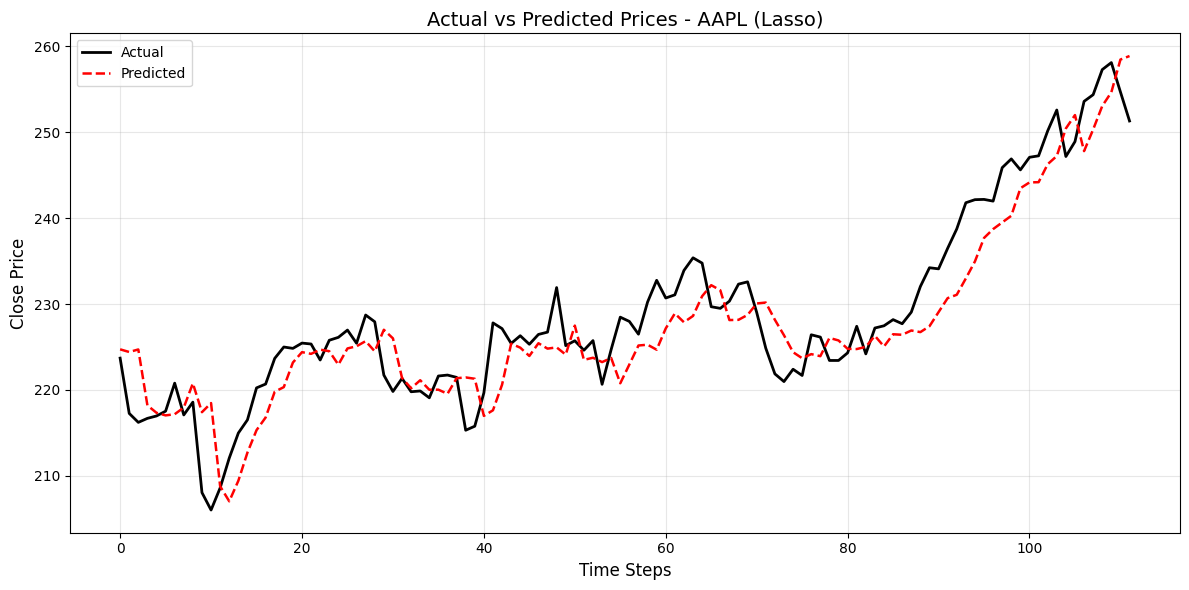


📊 Plotting Actual vs Predicted for AMD...
🏆 Best Model for AMD: Lasso


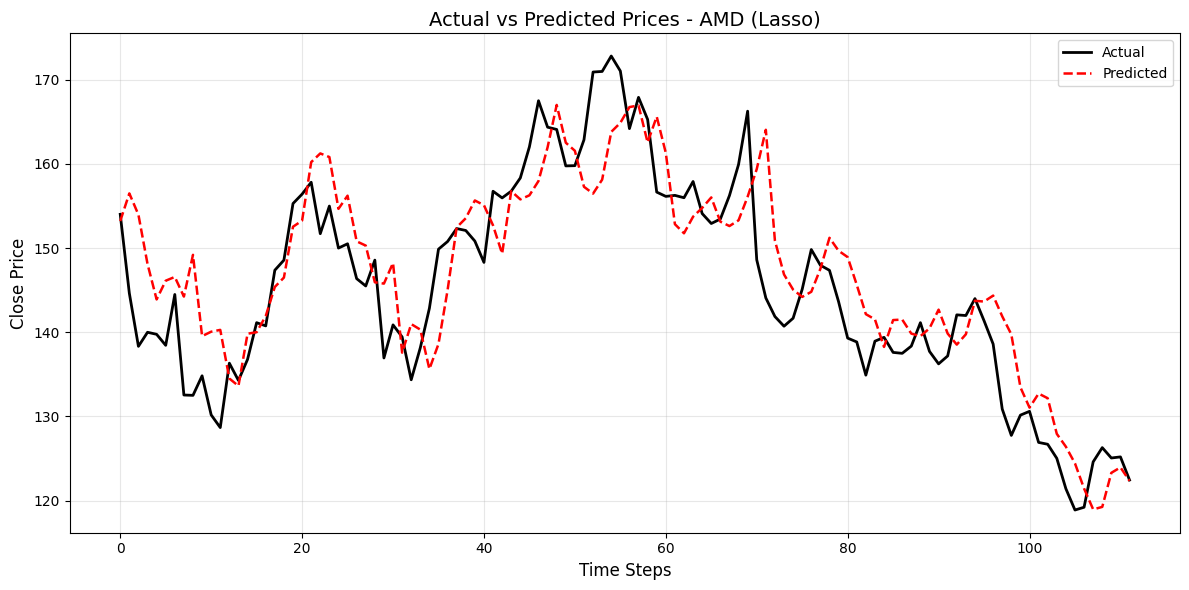


📊 Plotting Actual vs Predicted for APP...
🏆 Best Model for APP: Lasso


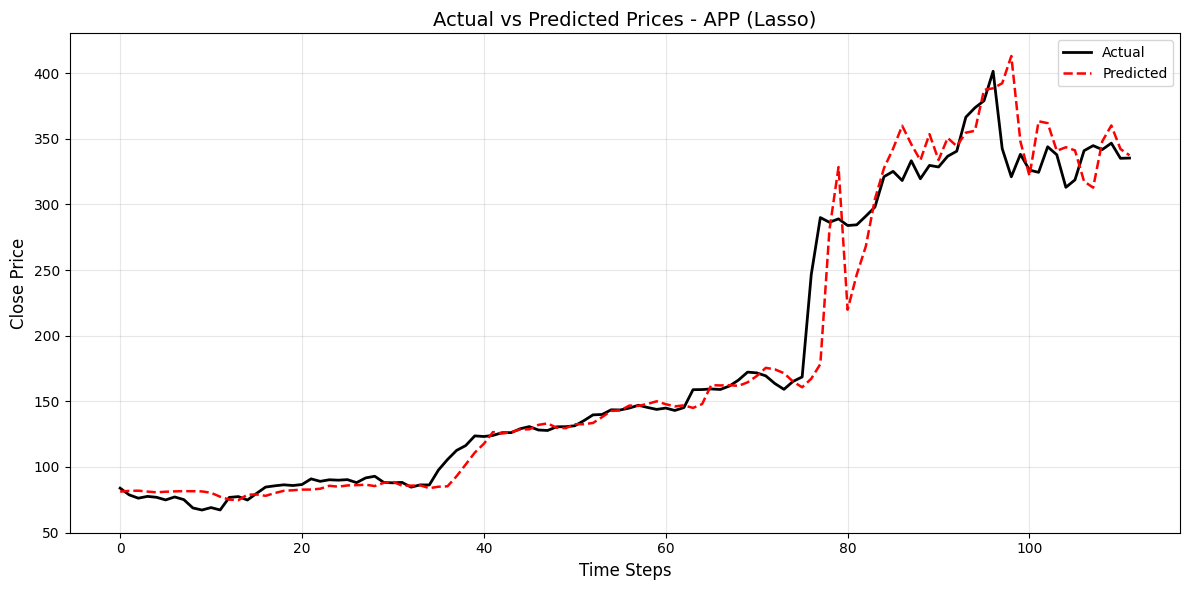


📊 Plotting Actual vs Predicted for AVGO...
🏆 Best Model for AVGO: Lasso


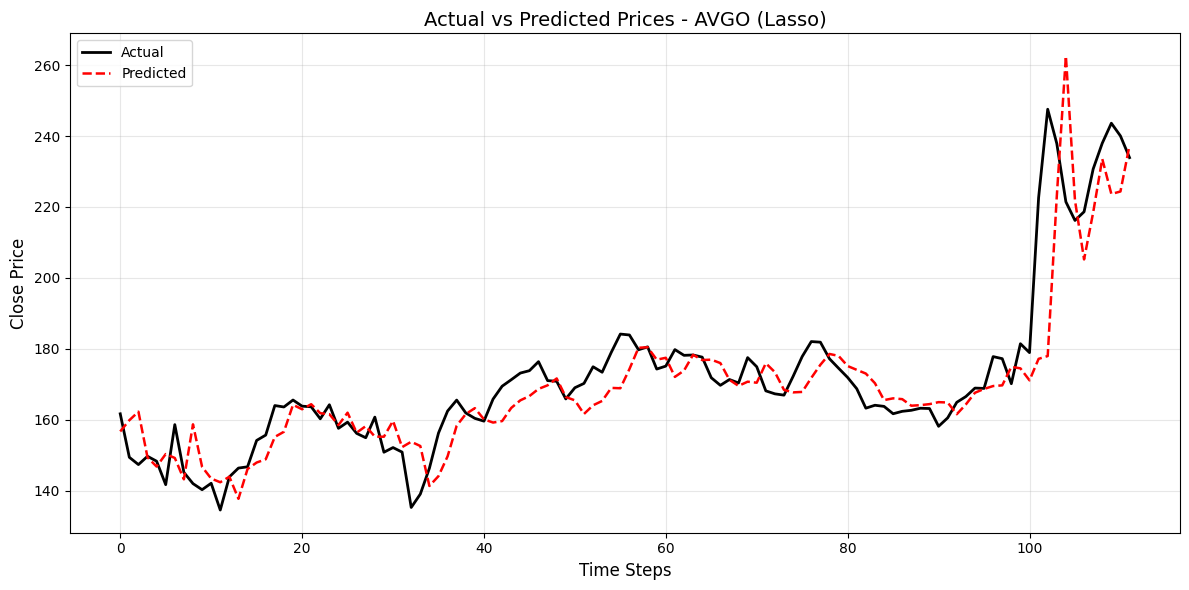


📊 Plotting Actual vs Predicted for GOOG...
🏆 Best Model for GOOG: LinearRegression


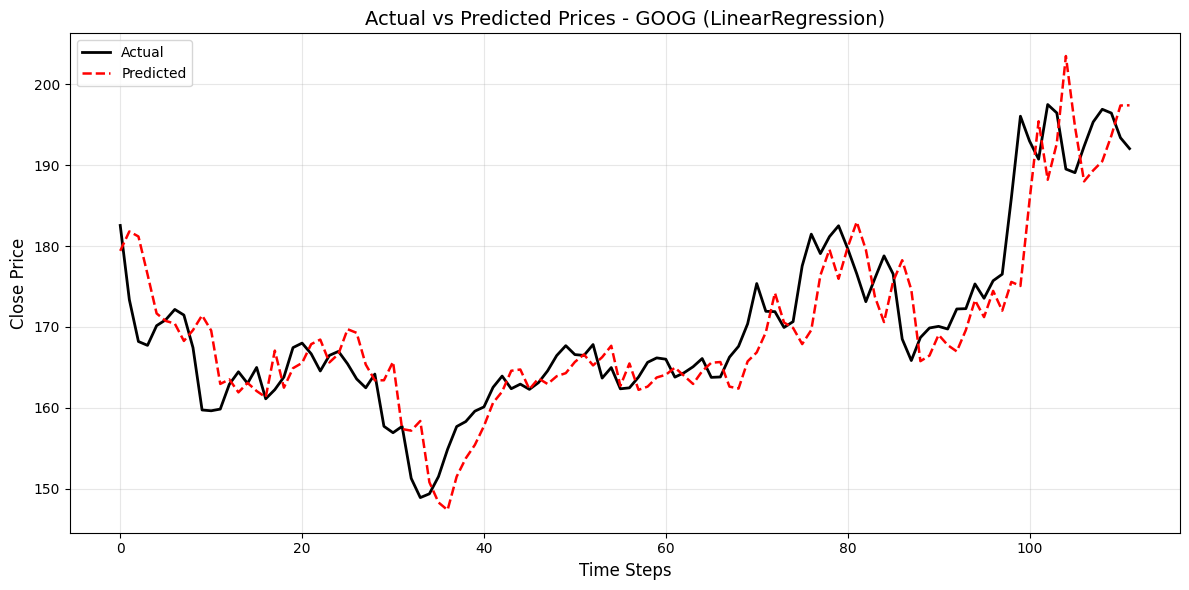


📊 Plotting Actual vs Predicted for GOOGL...
🏆 Best Model for GOOGL: LinearRegression


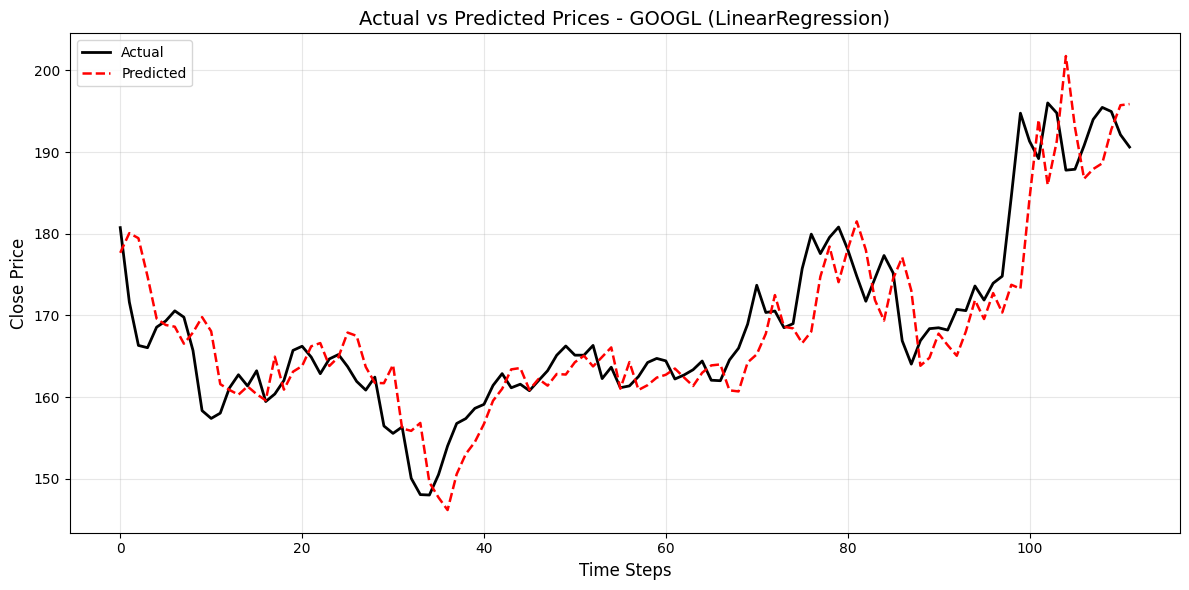


📊 Plotting Actual vs Predicted for META...
🏆 Best Model for META: Lasso


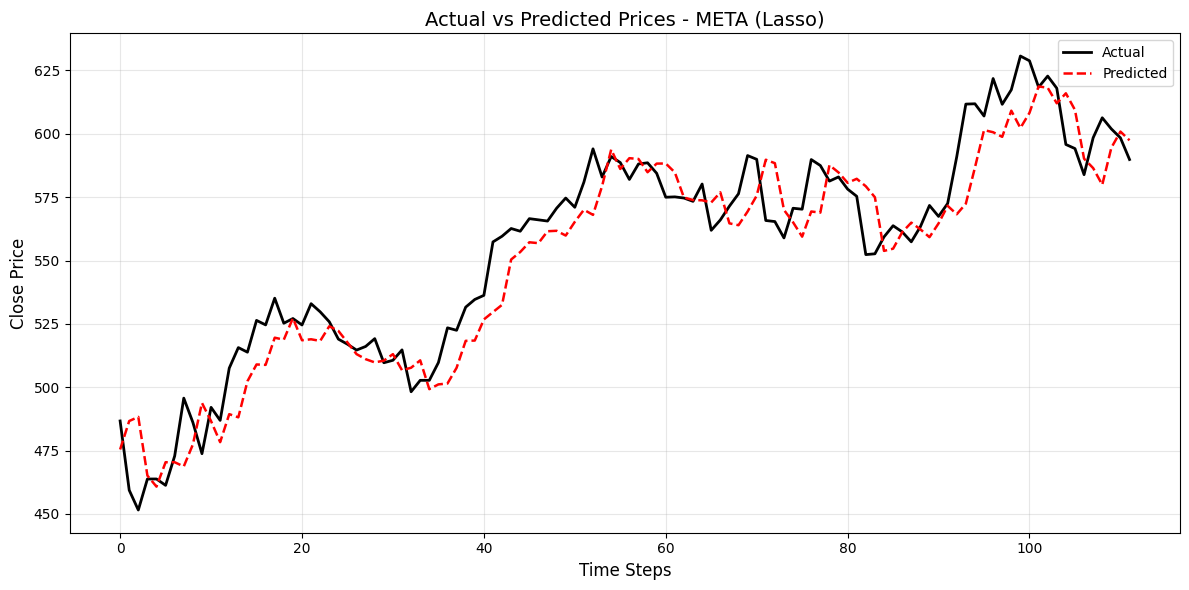


📊 Plotting Actual vs Predicted for MSFT...
🏆 Best Model for MSFT: Lasso


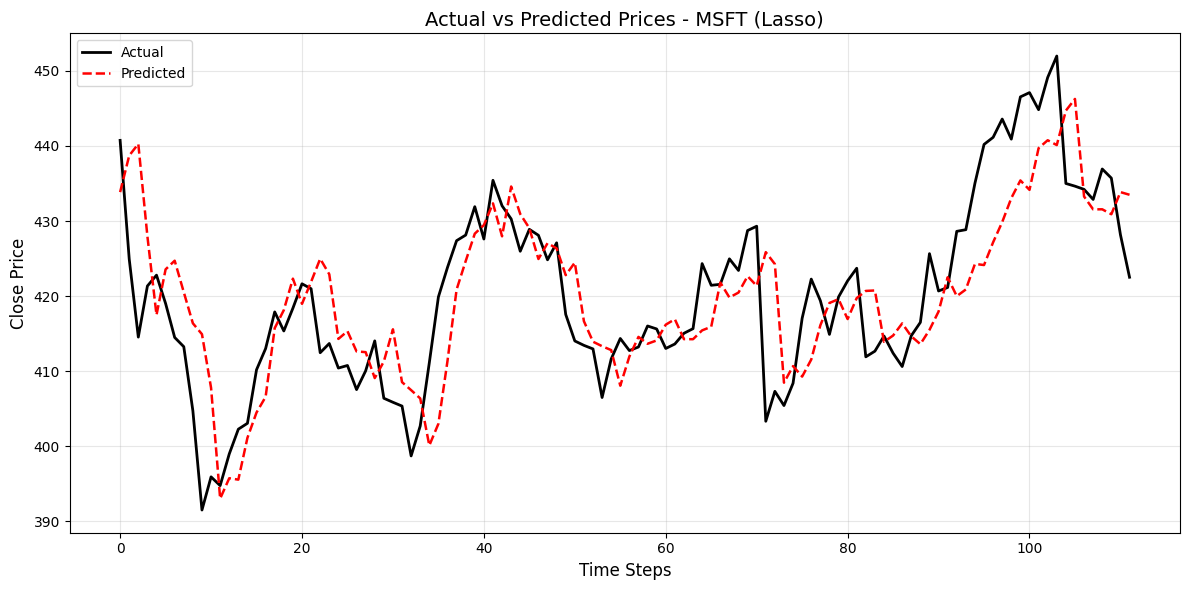


📊 Plotting Actual vs Predicted for NVDA...
🏆 Best Model for NVDA: Lasso


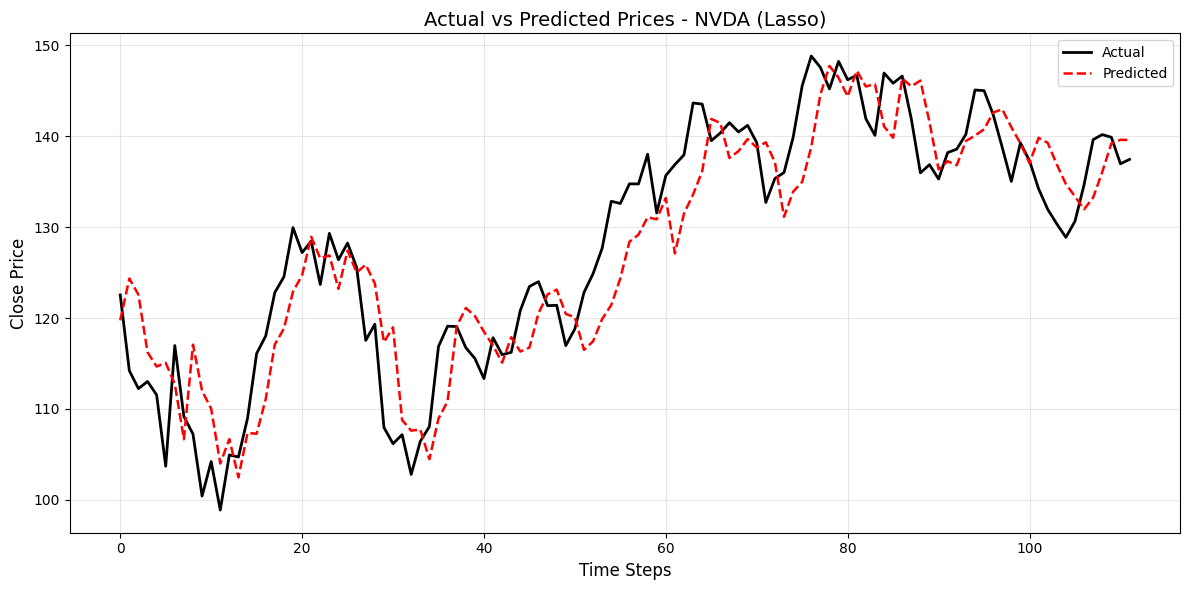


📊 Plotting Actual vs Predicted for PLTR...
🏆 Best Model for PLTR: Lasso


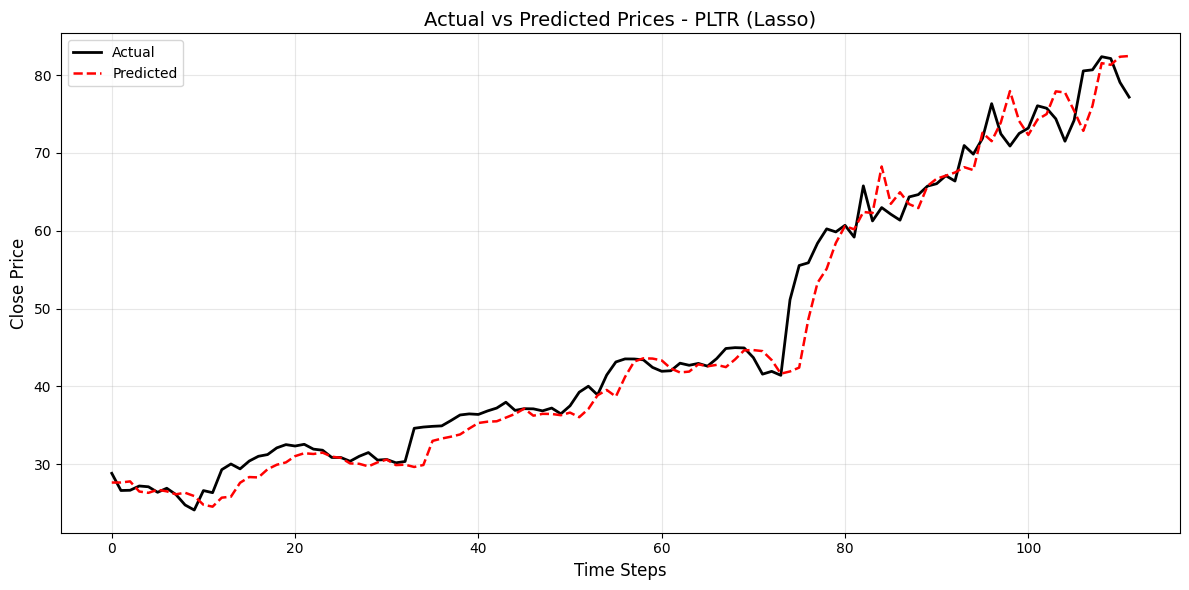

In [ ]:
import matplotlib.pyplot as plt

# ================================
# 6. PLOT ACTUAL vs PREDICTED
# ================================
for symbol, preds in all_predictions.items():
    print(f"\n📊 Plotting Actual vs Predicted for {symbol}...")

    # สร้าง DataFrame สำหรับทดสอบ (ใช้เฉพาะโมเดลที่ดีที่สุดจาก RMSE)
    results_df = all_results[symbol]
    best_model_name = results_df.loc[results_df['Test_RMSE'].idxmin(), 'Model']

    print(f"🏆 Best Model for {symbol}: {best_model_name}")

    actual = preds['actual_test'].values

    # ดึงค่าพยากรณ์ของโมเดลที่ดีที่สุด
    y_pred = preds['test_predictions'][best_model_name]

    # กรองเฉพาะค่าที่เป็นตัวเลข
    y_pred = np.array([p for p in y_pred if isinstance(p, (float, int))])
    actual = actual[-len(y_pred):]  # ปรับให้ขนาดเท่ากัน

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(actual, label='Actual', color='black', linewidth=2)
    plt.plot(y_pred, label='Predicted', color='red', linestyle='--', linewidth=1.8)

    plt.title(f'Actual vs Predicted Prices - {symbol} ({best_model_name})', fontsize=14)
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel('Close Price', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
